In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("ORCL.csv")

In [12]:
#function for two window
def twoWindow(s_window, l_window):
    short_ma = df['Adj Close'].rolling(window=s_window, min_periods=1).mean()
    long_ma = df['Adj Close'].rolling(window=l_window, min_periods=1).mean()
    adj_closes = df['Adj Close']
    own_stock = False
    gains = np.array([])
    losses = np.array([])
    for short, long, adj in zip(short_ma, long_ma, adj_closes):
        if short > long:
            if adj <= 100:
                    stock_owned = 100 // adj
                    bid = adj
                    own_stock = True
        elif own_stock and short < long:
            sell = adj * stock_owned
            profit = sell - bid *stock_owned
            own_stock = False
            if profit > 0:
                gains = np.append(gains, profit)
            elif profit < 0:
                losses = np.append(losses, profit)
    return gains, losses

#function for trimmed mean
def trimmedMean(gains, losses):
    if gains.size != 0:
        if gains.size > 3:
            trimmed_gains = np.delete(gains, [np.argmax(gains), np.argmin(gains)])
            trimmed_mean_gain = np.mean(trimmed_gains)
        else: trimmed_mean_gain = np.mean(gains)
    else:
        trimmed_mean_gain = None      
        
    if losses.size != 0:
        if losses.size > 3:
            trimmed_losses = np.delete(losses, [np.argmax(losses), np.argmin(losses)])
            trimmed_mean_loss = np.mean(trimmed_losses)
        else: trimmed_mean_loss = np.mean(losses)
    else: trimmed_mean_loss = None
        
    return trimmed_mean_gain, trimmed_mean_loss

In [13]:
s_window = range(10, 45, 5)
l_window = range(50, 85, 5)

In [14]:
#obtain dictionary and chage it to dataframe
gain_dict = {'Short Window': s_window}
loss_dict = {'Short Window': s_window}
for l in l_window:
    gain_list = []
    loss_list = []
    for s in s_window:
        gains, losses = twoWindow(s, l)
        trimmed_mean_gain, trimmed_mean_loss = trimmedMean(gains, losses)
        gain_list.append(trimmed_mean_gain)
        loss_list.append(trimmed_mean_loss)
    gain_dict[l] = gain_list
    loss_dict[l] = loss_list    
df_gain = pd.DataFrame(data=gain_dict).fillna(0.0)
df_gain = df_gain.set_index("Short Window")
df_loss = pd.DataFrame(data=loss_dict).fillna(0.0)
df_loss = df_loss.set_index("Short Window")

In [15]:
df_gain

,50,55,60,65,70,75,80
Short Window,,,,,,,
10,0.748989,0.940242,0.761468,1.122323,0.926071,0.843890,0.685448
15,0.771060,0.667419,0.734067,0.591580,0.341075,0.420866,0.754440
20,0.434093,0.683834,0.733608,0.542352,0.612529,0.730086,0.771585
25,0.430672,0.644634,0.789510,0.932690,0.914459,0.497887,0.607221
30,0.525441,0.522283,0.288919,0.491760,0.903622,0.576071,0.614571
35,0.624969,0.777192,0.589398,0.410015,0.756548,0.512021,0.293383
40,0.681822,0.415298,0.687136,0.278179,0.727178,0.377876,0.571945


In [16]:
df_loss

,50,55,60,65,70,75,80
Short Window,,,,,,,
10,-1.087543,-1.335638,-0.646996,-0.677262,-1.394221,-0.416380,-0.545647
15,-1.835976,-1.006314,-0.758513,-1.273989,-0.915668,-1.348127,-0.837959
20,-1.246743,-1.121065,-1.334343,-0.828280,-1.235600,-0.929464,-0.816470
25,-0.735784,-0.435329,-0.770168,-0.613248,-0.641234,-0.452886,-0.539813
30,-1.204597,-1.767214,-0.452650,-0.314640,-0.573114,-0.445396,-0.546647
35,-0.553452,-1.137960,-1.098607,-0.570565,-0.648549,-0.761208,-0.682826
40,-0.709565,-1.198621,-1.411856,-0.614277,-0.853690,-0.992845,-0.947477


In [17]:
#function to prepare data
def prepData(df):
    data = np.array([])
    for s in df.index:
        data = np.append(data, df.loc[s])
    return data
#function to prepare axis
def prepAxis(df):
    index = list(df.index)
    column = list(df.columns)
    x = []
    for i in index:
        for c in range(len(column)):
            x.append(i)
    y = column * len(index)
    return x, y

In [18]:
gain_data = prepData(df_gain)
loss_data = prepData(df_loss)
gain_x, gain_y = prepAxis(df_gain)
loss_x, loss_y = prepAxis(df_loss)

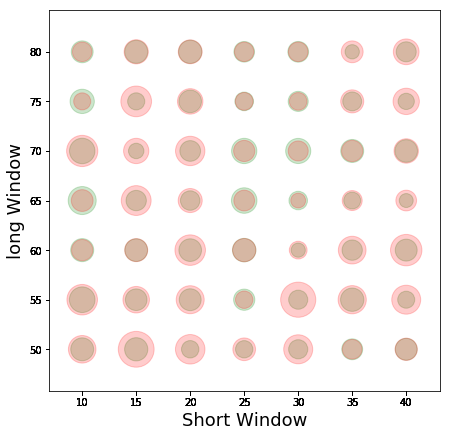

In [25]:
plt.figure(figsize=(7,7))
plt.xticks(gain_x)
plt.yticks(gain_y)
plt.scatter(gain_x, gain_y, s = gain_data * 700, color = 'g', alpha = 0.2)
plt.scatter(loss_x, loss_y, s = loss_data * -700, color = 'r', alpha = 0.2 )
plt.xlabel('Short Window', fontsize=18)
plt.ylabel('long Window', fontsize=18)
plt.show()